In [299]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import copy
# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(3, 80)  # First layer with 3 inputs and 5 outputs
        self.layer2 = nn.Linear(80, 1)  # Second layer with 5 inputs and 1 output

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = self.layer2(x)
        return x

In [ ]:
a = torch.tensor([1, 1, 0], requires_grad=True)
b = torch.tensor([1, 0, 1], requires_grad=True)
cross_entropy_loss = nn.CrossEntropyLoss(a,b)
print(cross_entropy_loss)

In [300]:
# Initialize the network
net1 = SimpleNN()
net2 = copy.deepcopy(net1)

# for name, param in net1.named_parameters():
#     if param.requires_grad:
#         print(f"Parameter: {name}\n{param.data}\n")

# for name, param in net2.named_parameters():
#     if param.requires_grad:
#         print(f"Parameter: {name}\n{param.data}\n")


In [301]:

# Generate 4 random data points with 3 features each
data = torch.randn(4, 3)
# Generate random target values
target = torch.randn(4, 1)

x0 = torch.randn(1, 3)
y0 = torch.randn(1, 1)

# Define a loss function and an optimizer
criterion = nn.MSELoss()
optimizer1 = optim.SGD(net1.parameters(), lr=0.01)
optimizer2 = optim.SGD(net2.parameters(), lr=0.01)
# Forward pass: Compute predicted y by passing data to the model
output1 = net1(data)

# Compute and print loss
loss1 = criterion(output1, target)
print('Loss before backward pass:', loss1.item())

# Zero gradients, perform a backward pass, and update the weights
optimizer1.zero_grad()
loss1.backward()
optimizer1.step()

# for name, param in net1.named_parameters():
#     if param.requires_grad:
#         print(f"Parameter: {name}\n{param.data}\n")

Loss before backward pass: 0.23243877291679382


In [302]:
gamma = 0.01 # step size
w = torch.ones(data.size(0))
print(w)

tensor([1., 1., 1., 1.])


In [303]:
norms = []
itr = 200
for iter in range(itr):
    output0 = net2(x0.unsqueeze(0))
    loss0 = nn.MSELoss()(output0, y0.unsqueeze(0))
    optimizer2.zero_grad()
    loss0.backward()
    gradient0 = {name: param.grad.clone() for name, param in net2.named_parameters()}

    sum_gradients = {name: torch.zeros_like(param) for name, param in net2.named_parameters()}
    # individual_gradients = []
    for i in range(data.size(0)):
        # Forward pass for a single data point
        output_i = net2(data[i].unsqueeze(0))
        loss2 = nn.MSELoss()(output_i, target[i].unsqueeze(0))
        
        # Zero the gradients
        optimizer2.zero_grad()
        
        # Backward pass
        loss2.backward()
        
        # Store the gradients for the current data point
        current_gradients = {name: param.grad.clone() for name, param in net2.named_parameters()}
        # individual_gradients.append(current_gradients)
        inner_product = sum((torch.flatten(gradient0[name]) * torch.flatten(current_gradients[name])).sum() for name in gradient0.keys())
        # print(inner_product)
        w[i] += gamma * inner_product
        w[i] = torch.clamp(w[i], 0, 1)

        # Accumulate the gradients
        for name, param in net2.named_parameters():
            if param.grad is not None:
                sum_gradients[name] += w[i] * param.grad.clone()
    print(w)
    for name, param in net2.named_parameters():
        if param.grad is not None:
            param.grad = sum_gradients[name]
    
    norms.append(torch.norm(param.grad))
    optimizer2.step()
    # for name, param in net1.named_parameters():
    #     if param.requires_grad:
    #         print(f"Parameter: {name}\n{param.data}\n")

    

tensor([1.0000, 1.0000, 0.8815, 0.9761])
tensor([1.0000, 1.0000, 0.7807, 0.9635])
tensor([1.0000, 1.0000, 0.6897, 0.9558])
tensor([1.0000, 1.0000, 0.6064, 0.9517])
tensor([1.0000, 1.0000, 0.5293, 0.9500])
tensor([1.0000, 1.0000, 0.4570, 0.9498])
tensor([1.0000, 1.0000, 0.3885, 0.9506])
tensor([1.0000, 1.0000, 0.3228, 0.9517])
tensor([1.0000, 1.0000, 0.2593, 0.9526])
tensor([0.9980, 1.0000, 0.1972, 0.9531])
tensor([0.9941, 1.0000, 0.1361, 0.9527])
tensor([0.9888, 1.0000, 0.0755, 0.9513])
tensor([0.9824, 1.0000, 0.0148, 0.9485])
tensor([0.9750, 1.0000, 0.0000, 0.9441])
tensor([0.9677, 1.0000, 0.0000, 0.9388])
tensor([0.9607, 1.0000, 0.0000, 0.9333])
tensor([0.9544, 1.0000, 0.0000, 0.9278])
tensor([0.9485, 1.0000, 0.0000, 0.9222])
tensor([0.9431, 1.0000, 0.0000, 0.9168])
tensor([0.9382, 1.0000, 0.0000, 0.9114])
tensor([0.9337, 1.0000, 0.0000, 0.9063])
tensor([0.9295, 1.0000, 0.0000, 0.9012])
tensor([0.9256, 1.0000, 0.0000, 0.8963])
tensor([0.9220, 1.0000, 0.0000, 0.8916])
tensor([0.9186, 

tensor([0.8630, 1.0000, 0.0000, 0.7904])
tensor(2.7047e-05)


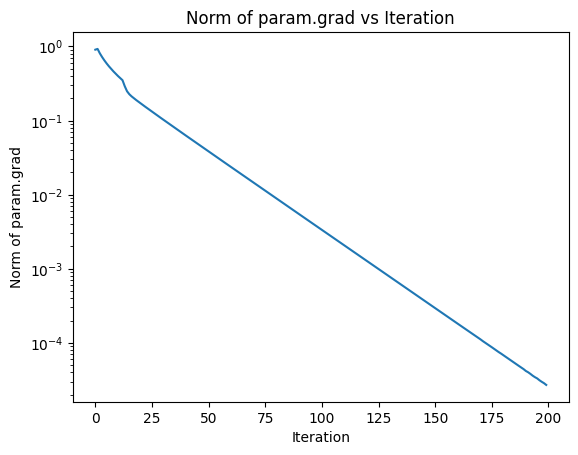

In [304]:
print(w)
print(norms[len(norms) - 1])
plt.plot(range(itr), norms)
plt.xlabel('Iteration')
plt.ylabel('Norm of param.grad')
plt.title('Norm of param.grad vs Iteration')
plt.yscale('log')
plt.show()



In [305]:
# sum2 = {name: torch.zeros_like(param) for name, param in net2.named_parameters()}

# for gradients in individual_gradients:
#     for name, param in gradients.items():
#         sum2[name] += param

# for name, param in sum2.items():  # Fix: iterate over items() to access both key and value
#     print(f"Parameter: {name}\n{param.data}\n")

# for name, param in sum_gradients.items():  # Fix: iterate over items() to access both key and value
#     print(f"Parameter: {name}\n{param.data}\n")
